In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
df=pd.read_csv('C:\\Users\\CYBER-TECH\\Downloads\\TITANIC.CSV')

In [5]:
# preview the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.shape

(891, 12)

In [11]:
# check for null values
print("Missing Values\n:",df.isnull().sum())
# check for duplicate
print("\nDuplicate count:",df.duplicated().sum())

Missing Values
: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicate count: 0


In [13]:
# 1. Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Better to use median for age
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill with most common port

C:\Users\CYBER-TECH\AppData\Local\Temp\ipykernel_53604\2337079046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)  # Better to use median for age
C:\Users\CYBER-TECH\AppData\Local\Temp\ipykernel_53604\2337079046.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [15]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Convert gender to numerical


In [17]:
# 3. Select and prepare features
features = ['Pclass', 'Sex', 'Age', 'Embarked']
X = pd.get_dummies(df[features], columns=['Embarked'])  # One-hot encode Embarked
y = df['Survived']

In [19]:
df=df[['Survived','Pclass','Age','SibSp','Parch']]
corr_matrix=df.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000


In [21]:
# Data Splitting
# Split the data into Train (60%), Validation (20%), Test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

In [23]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [25]:
param_grid = {
    'n_neighbors': range(1, 31), 
    'metric': ['euclidean', 'manhattan']  
    
}

In [27]:


knn = KNeighborsClassifier()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

## Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
)

In [43]:
grid_search.fit(X_train_scaled ,y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy: {:.4f}".format(grid_search.best_score_))

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 21}
Best CV Accuracy: 0.8146


In [53]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=21)
clf_knn_3.fit(X_train_scaled,  y_train)

print("Accuracy Score: ",accuracy_score(y_val, clf_knn_3.predict(X_val_scaled)))

Accuracy Score:  0.8202247191011236


In [61]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=21)
clf_knn_3.fit(X_train_scaled,  y_train)
test_pred=clf_knn_3.predict(X_test_scaled )
print("Accuracy Score: ",accuracy_score(y_test,test_pred ))


Accuracy Score:  0.7932960893854749


In [63]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[104   6]
 [ 31  38]]


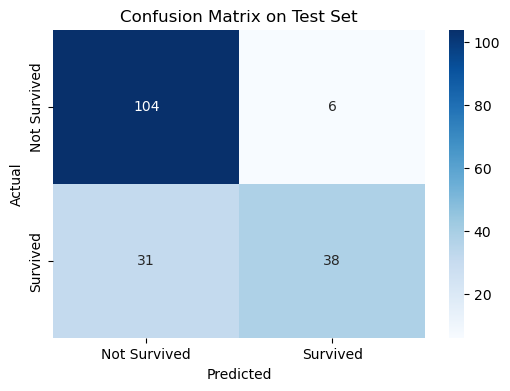

In [65]:
# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

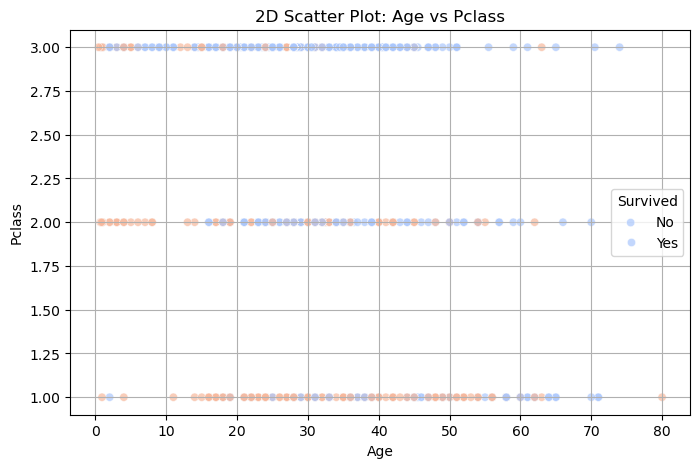

In [135]:
#2D Scatter Plot: Age vs Pclass
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Pclass', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('2D Scatter Plot: Age vs Pclass')
plt.xlabel('Age')
plt.ylabel('Pclass')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(True)
plt.show()

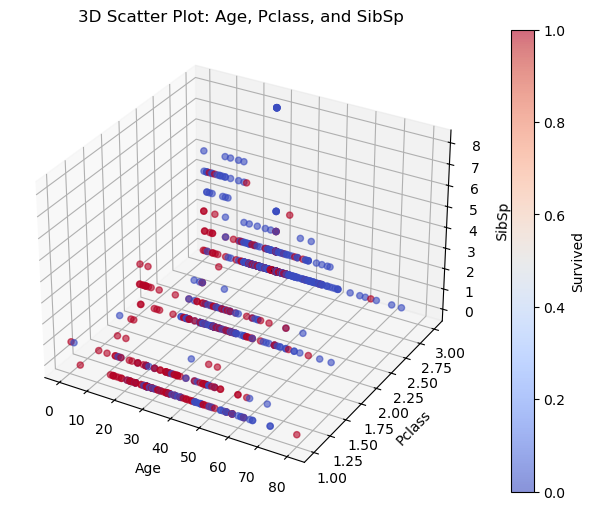

In [137]:
#3D Scatter Plot: Age, Pclass, and SibSp
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['Age'], df['Pclass'], df['SibSp'],
                c=df['Survived'], cmap='coolwarm', alpha=0.6)

ax.set_xlabel('Age')
ax.set_ylabel('Pclass')
ax.set_zlabel('SibSp')
plt.title('3D Scatter Plot: Age, Pclass, and SibSp')
plt.colorbar(sc, label='Survived')
plt.show()